In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import pandas as pd
import seaborn as sns

In [2]:
drug_data = pd.read_csv('/kaggle/input/national-survey-on-drug-use-and-health-2021/NSDUH_2021_Tab.txt',sep='\t')
print(drug_data.info())

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (2792) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58034 entries, 0 to 58033
Columns: 2988 entries, QUESTID2 to VEREP
dtypes: float64(539), int64(2447), object(2)
memory usage: 1.3+ GB
None


In [3]:
drug_data.head(10)

,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,GOVTPROG,INCOME,POVERTY3,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR_C,VEREP
0,10000182,10/06/2022,1,99,99,19,9999,99,1,7,...,1,1,2.0,2,3,2,2,675.130812,40047,1
1,10001255,10/06/2022,1,99,99,15,9999,99,4,93,...,2,4,3.0,1,1,2,2,12435.513603,40037,2
2,10001831,10/06/2022,2,99,99,991,9991,91,91,91,...,2,2,2.0,2,2,2,2,647.085653,40037,2
3,10002722,10/06/2022,1,99,99,9,9999,99,1,30,...,2,2,2.0,1,1,2,2,11275.260484,40045,2
4,10002897,10/06/2022,2,99,99,991,9991,91,91,91,...,2,1,1.0,1,1,2,2,350.985132,40006,1
5,10003413,10/06/2022,1,99,99,15,9999,99,1,30,...,2,3,2.0,1,1,2,2,83739.860176,40041,2
6,10004677,10/06/2022,1,99,99,23,2021,6,1,1,...,2,4,3.0,1,1,2,2,1988.435640,40021,2
7,10004796,10/06/2022,2,99,99,991,9991,91,91,91,...,2,3,3.0,2,2,2,2,382.287416,40008,1
8,10004832,10/06/2022,2,4,4,991,9991,91,91,91,...,1,1,1.0,2,2,2,2,3873.589659,40007,2
9,10005265,10/06/2022,2,99,99,991,9991,91,91,91,...,2,1,1.0,1,1,2,2,2545.014038,40022,2


**Choosing the required variables**

In [4]:
filtered_drug_data = drug_data[['GOVTPROG', 'INCOME', 'POVERTY3', 'COUTYP4', 'WRKDPSTYR', 'WRKHADJOB','IRSEX', 'IRMARIT', 'CATAG7','HEALTH2', 'NEWRACE2']]
filtered_drug_data.head(10)

,GOVTPROG,INCOME,POVERTY3,COUTYP4,WRKDPSTYR,WRKHADJOB,IRSEX,IRMARIT,CATAG7,HEALTH2,NEWRACE2
0,1,1,2.0,3,2,2,2,4,6,4.0,1
1,2,4,3.0,1,2,2,1,1,7,3.0,1
2,2,2,2.0,2,99,99,2,4,5,2.0,1
3,2,2,2.0,1,2,2,1,4,7,2.0,1
4,2,1,1.0,1,2,2,1,4,5,1.0,7
5,2,3,2.0,1,2,2,1,1,7,3.0,7
6,2,4,3.0,1,99,99,1,4,5,2.0,5
7,2,3,3.0,2,99,99,2,4,7,3.0,1
8,1,1,1.0,2,99,99,2,99,1,3.0,2
9,2,1,1.0,1,99,99,2,4,4,2.0,7


**Plotting of Data**

Text(0, 0.5, 'Frequency')

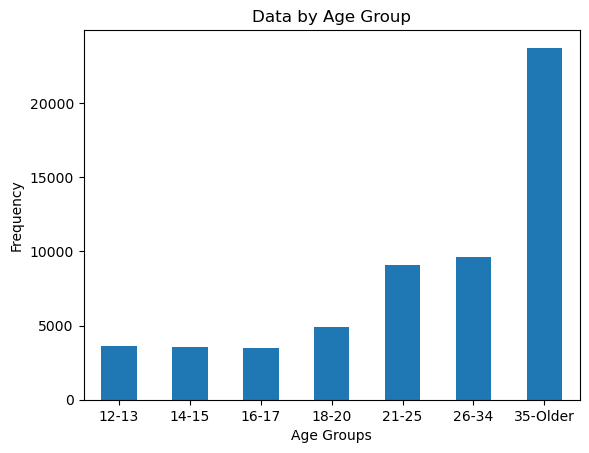

In [5]:
fig, ax = plt.subplots()

age_dictionary = {'1': '12-13','2': '14-15','3': '16-17','4': '18-20','5': '21-25','6': '26-34','7': '35-Older', }
ax = filtered_drug_data['CATAG7'].value_counts().sort_index().plot(ax=ax, kind='bar', title = 'Data by Age Group')
ax.set_xticklabels(age_dictionary.values(), rotation=360)
ax.set_xlabel("Age Groups")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

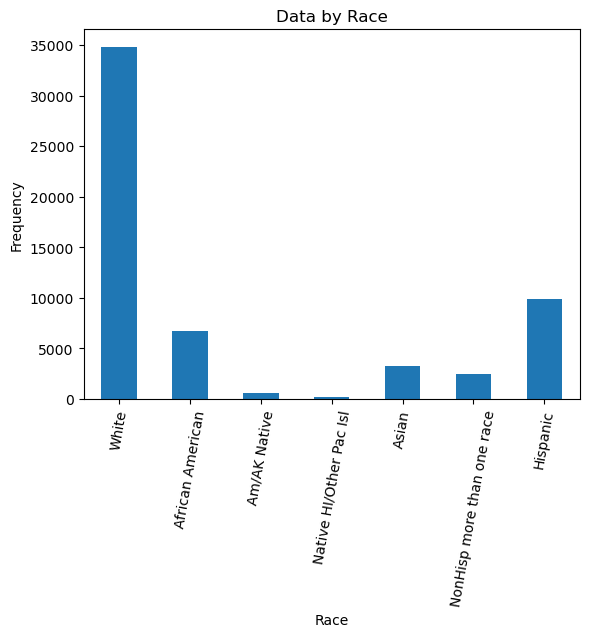

In [6]:
fig, ax = plt.subplots()

race_dictionary = {'1': 'White','2': 'African American','3': 'Am/AK Native','4': 'Native HI/Other Pac Isl','5': 'Asian','6': 'NonHisp more than one race','7': 'Hispanic', }
ax = filtered_drug_data['NEWRACE2'].value_counts().sort_index().plot(ax=ax, kind='bar', title = 'Data by Race')
ax.set_xticklabels(race_dictionary.values(), rotation=80)
ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

**Drug Use Analysis**

In [7]:
filtered_drug_use_data = drug_data[['CIGEVER','CIGTRY','METHAMEVR', 'METHAMAGE', 'ALCEVER', 'ALCTRY', 'MJEVER', 'MJAGE','COCEVER', 'COCAGE', 'CRKEVER','CRKAGE', 'HEREVER', 'HERAGE', 'METHAMEVR',
                                   'METHAMAGE']]
filtered_drug_use_data.head(10)
filtered_drug_use_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58034 entries, 0 to 58033
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CIGEVER    58034 non-null  int64
 1   CIGTRY     58034 non-null  int64
 2   METHAMEVR  58034 non-null  int64
 3   METHAMAGE  58034 non-null  int64
 4   ALCEVER    58034 non-null  int64
 5   ALCTRY     58034 non-null  int64
 6   MJEVER     58034 non-null  int64
 7   MJAGE      58034 non-null  int64
 8   COCEVER    58034 non-null  int64
 9   COCAGE     58034 non-null  int64
 10  CRKEVER    58034 non-null  int64
 11  CRKAGE     58034 non-null  int64
 12  HEREVER    58034 non-null  int64
 13  HERAGE     58034 non-null  int64
 14  METHAMEVR  58034 non-null  int64
 15  METHAMAGE  58034 non-null  int64
dtypes: int64(16)
memory usage: 7.1 MB


Find how many have used any of the substances mentioned in data set

In [8]:
# confirmed_drug_used = filtered_drug_use_data.query("CIGEVER = 1")
drug_used_correlation = drug_data[['CIGEVER','METHAMEVR', 'ALCEVER', 'MJEVER','COCEVER', 'CRKEVER', 'HEREVER']]

# change garbage values to zero
    
for a in drug_used_correlation.columns:
    drug_used_correlation.loc[drug_used_correlation[a] > 1, a] = 0

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


# Correlation of values

In [9]:
corr = drug_used_correlation.corr(method='kendall')
corr.style.background_gradient(cmap='coolwarm')

,CIGEVER,METHAMEVR,ALCEVER,MJEVER,COCEVER,CRKEVER,HEREVER
CIGEVER,1.000000,0.226148,0.457764,0.527134,0.358534,0.181328,0.151858
METHAMEVR,0.226148,1.000000,0.128939,0.234909,0.464046,0.453658,0.398724
ALCEVER,0.457764,0.128939,1.000000,0.486901,0.221551,0.099510,0.082433
MJEVER,0.527134,0.234909,0.486901,1.000000,0.398514,0.186176,0.152665
COCEVER,0.358534,0.464046,0.221551,0.398514,1.000000,0.461632,0.343331
CRKEVER,0.181328,0.453658,0.099510,0.186176,0.461632,1.000000,0.476015
HEREVER,0.151858,0.398724,0.082433,0.152665,0.343331,0.476015,1.000000


# People who start drugs when they were minors

In [10]:
# fig, ax = plt.subplots()
first_drug_used_date = drug_data[['CIGTRY', 'METHAMAGE', 'ALCTRY', 'MJAGE', 'COCAGE','CRKAGE', 'HERAGE']]
first_drug_used_date.head(10)
under_age = first_drug_used_date.query("CIGTRY < 18 | METHAMAGE < 18  | ALCTRY < 18  | MJAGE < 18  | COCAGE < 18  | CRKAGE < 18 | HERAGE < 18")
under_age_dictionary = {}

minor_dataFrame = pd.DataFrame(under_age.columns, columns=['Substance'])
minor_count = []
#count the under age cells
for a in under_age.columns:
    all_under_age = under_age.filter(items =[a]).query(a + "< 18")
    raws, columns = all_under_age.shape
    minor_count.append(raws)
#     under_age_dictionary['substance'] = a
#     under_age_dictionary['count'] = raws
minor_dataFrame['Count'] = minor_count
#sort the data for better visualization
minor_dataFrame = minor_dataFrame.sort_values(by=['Count'], ascending=False)
print(minor_dataFrame)

   Substance  Count
2     ALCTRY  23155
0     CIGTRY  16029
3      MJAGE  14010
4     COCAGE   1493
1  METHAMAGE    733
5     CRKAGE    300
6     HERAGE    181


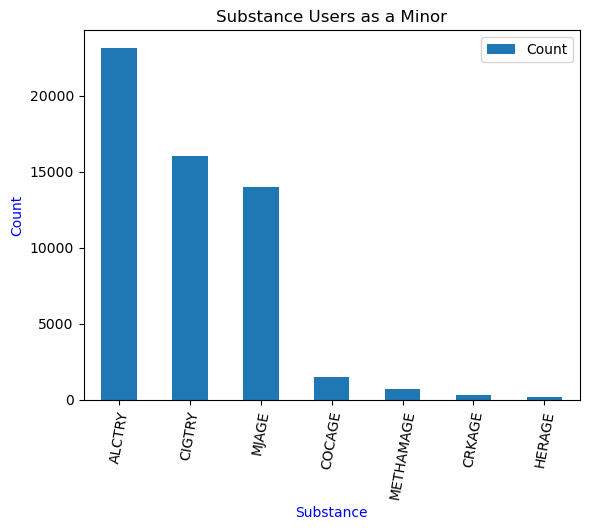

In [11]:
fig, ax = plt.subplots()
ax = minor_dataFrame.plot(ax=ax, kind='bar', title = 'Substance Users as a Minor')
ax.set_xticklabels(minor_dataFrame['Substance'], rotation=80)
ax.set_xlabel("Substance")
ax.set_ylabel("Count")
ax.xaxis.label.set_color('blue')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('blue') 

# Eudcation

By 'school' mean elementary school, junior high or middle school, high school, or a college or university.
Please include home schooling as well. Do you go to school?

In [12]:
education_data = drug_data[['ENRLCOLLST2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUFULPAR', 'CATAGE']]
education_data.head(10)

,ENRLCOLLST2,EDUSCHLGO,EDUSCHGRD2,EDUFULPAR,CATAGE
0,5,2,99,99,3
1,5,2,99,99,4
2,5,2,99,99,2
3,5,2,99,99,4
4,5,2,99,99,2
5,5,2,99,99,4
6,5,2,99,99,2
7,5,2,99,99,4
8,5,1,2,1,1
9,1,1,9,1,2


<class 'pandas.core.frame.DataFrame'>
   EDUSCHLGO  count
1          2   8050
0          1   1036
4         98    431
3         97     33
2         11      1
['orange', 'cadetblue', 'orange', 'orange', 'orange']


Text(0.5, 1.0, 'Which underaged (12-17) are going to School')

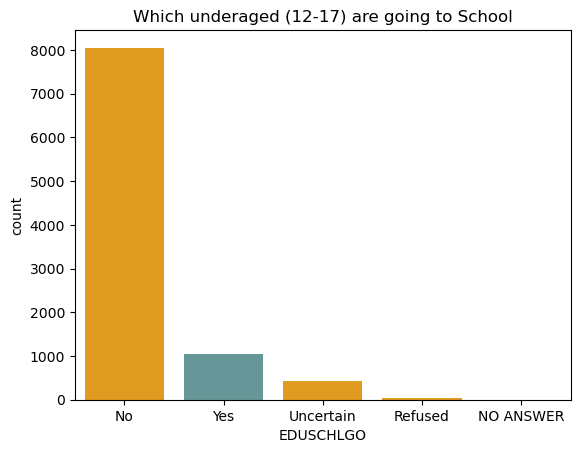

In [13]:
# plotting data
print(type(education_data))
school_data = education_data[['EDUSCHLGO','CATAGE']].query("EDUSCHLGO != 85 & EDUSCHLGO != 94 & CATAGE == 3")
plot_data = school_data.value_counts()
plot_data = school_data.groupby(['EDUSCHLGO']).size().reset_index(name='count')
#sort values for graph
plot_order = plot_data.sort_values(by='count', ascending=False).EDUSCHLGO.values
#sort values for dataframe(since seaborn plot dont follow the order of the dataframe)
plot_data = plot_data.sort_values(by=['count'], ascending=False)
print(plot_data.head())
# want to highlight people who are going to school ( 1== yes)
colors = ['cadetblue' if (x == 1) else 'orange' for x in plot_data.EDUSCHLGO]
print(colors)
plot = sns.barplot(x=plot_data['EDUSCHLGO'], y=plot_data['count'], palette=colors ,order=plot_order)
plot.set_xticklabels(['No','Yes', 'Uncertain','Refused', 'NO ANSWER'], rotation=0)
plot.set_title("Which underaged (12-17) are going to School")

Need to figure out how education got effected with recenet drug use


In [14]:
#finding out peple who are aged between 12-17 and not going to school and also used atleast one substance in past 30 days

#IRMJFM - marjuwana , IRALCFM - alchohol, IICRKFM - cocain, IRHALLUC30N - HALLUCINOGEN, IRINHAL30N - inhalent, IRMETHAM30N - meth
#IRTRQNM30FQ - TRANQUILIZERS, IRPNRNM30FQ - PAIN RELIEVERS,  IRSEDNM30FQ- sedatives , IRSTMNM30FQ - Stimulants
#removed some school attending status due to outliers
minor_recent_drug_used = drug_data[['IRMJFM', 'IRALCFM', 'IRCRKFM', 'IRHALLUC30N', 'IRINHAL30N', 'IRMETHAM30N',
                            'IRTRQNM30FQ','IRPNRNM30FQ','IRSEDNM30FQ', 'IRSTMNM30FQ','EDUSCHLGO', 'CATAGE', 'IRCOCFM']].query(
    "(EDUSCHLGO == 1 | EDUSCHLGO == 2 | EDUSCHLGO == 98) & CATAGE == 1 & (IRMJFM <= 30 | IRALCFM <= 30 | IRCOCFM <= 30 | IRCRKFM <= 30 | IRHALLUC30N  <= 30 | IRINHAL30N <= 30 | IRMETHAM30N  <= 30 | IRTRQNM30FQ  <= 30 | IRPNRNM30FQ  <= 30 | IRSEDNM30FQ  <= 30 | IRSTMNM30FQ  <= 30)")
minor_recent_drug_used = minor_recent_drug_used.drop(["CATAGE"], axis = 1)
print(type(minor_recent_drug_used))
# find recently used 


print(minor_recent_drug_used)
    

<class 'pandas.core.frame.DataFrame'>
       IRMJFM  IRALCFM  IRCRKFM  IRHALLUC30N  IRINHAL30N  IRMETHAM30N  \
47       91.0      1.0       91         91.0        91.0         91.0   
48        5.0      4.0       91         93.0        91.0         91.0   
104       2.0     93.0       91         91.0        91.0         91.0   
109      93.0     93.0       91         93.0        93.0         91.0   
231       1.0      7.0       91         91.0        93.0         91.0   
...       ...      ...      ...          ...         ...          ...   
57690    91.0      1.0       91         91.0        91.0         91.0   
57801    91.0     91.0       91         91.0         1.5         91.0   
57875    28.0      2.0       91         91.0        91.0         91.0   
57893     1.0      1.0       91         93.0        91.0         91.0   
57901    93.0      1.0       91         91.0        91.0         91.0   

       IRTRQNM30FQ  IRPNRNM30FQ  IRSEDNM30FQ  IRSTMNM30FQ  EDUSCHLGO  IRCOCFM  
47   

In [15]:
def findSubstanceFrequency(drugs_array):
    for drug in drugs_array:
        if drug <= 30:
            return drug
        
#get the index from matching element in the series
def findSubstanceName(drugs_array):
    for drug in drugs_array:
        if drug <= 30:
            return drugs_array[drugs_array == drug].index[0]

Creating two columns to summarize the substance use in last 30 days

In [16]:
minor_recent_drug_used['used_frquency'] = minor_recent_drug_used.apply(lambda x: findSubstanceFrequency(x) ,axis=1)
minor_recent_drug_used['used_drug'] = minor_recent_drug_used.apply(lambda x: findSubstanceName(x) ,axis=1)
print(minor_recent_drug_used.head(10))

#drop unwanted columns
thisFilter = minor_recent_drug_used.filter(['IRMJFM' , 'IRALCFM',  'IRCRKFM',  'IRHALLUC30N',  'IRINHAL30N',  'IRMETHAM30N','IRTRQNM30FQ' , 'IRPNRNM30FQ' , 'IRSEDNM30FQ',  'IRSTMNM30FQ', 'IRCOCFM'])
minor_recent_drug_used.drop(thisFilter, inplace=True, axis=1)
# minor_recent_drug_used = minor_recent_drug_used.drop(, axis = 1)
print(minor_recent_drug_used.head(10))

     IRMJFM  IRALCFM  IRCRKFM  IRHALLUC30N  IRINHAL30N  IRMETHAM30N  \
47     91.0      1.0       91         91.0        91.0         91.0   
48      5.0      4.0       91         93.0        91.0         91.0   
104     2.0     93.0       91         91.0        91.0         91.0   
109    93.0     93.0       91         93.0        93.0         91.0   
231     1.0      7.0       91         91.0        93.0         91.0   
237    93.0      1.0       91         91.0        91.0         91.0   
240    29.0     10.0       91         93.0        93.0         91.0   
283     2.0      7.0       91         91.0        91.0         91.0   
499    10.0     93.0       91         91.0        91.0         91.0   
557     2.0     93.0       91         91.0        91.0         91.0   

     IRTRQNM30FQ  IRPNRNM30FQ  IRSEDNM30FQ  IRSTMNM30FQ  EDUSCHLGO  IRCOCFM  \
47            91         91.0           91         91.0          1       91   
48            91         91.0           91         91.0     

In [17]:
#WRKDPSTWK Len : 2 WORK AT JOB LAST WEEK
#PDEN10 Len : 1 POPULATION DENSITY 2010 - THREE LEVELS
# group_by = minor_recent_drug_used.groupby(['EDUSCHLGO', 'IRMJFM', 'IRALCFM', 'IRCRKFM', 'IRHALLUC30N', 'IRINHAL30N', 'IRMETHAM30N',
#                             'IRTRQNM30FQ','IRPNRNM30FQ','IRSEDNM30FQ', 'IRSTMNM30FQ', 'IRCOCFM']).size().reset_index(name='count')


#Group by
print(minor_recent_drug_used.info())
minor_recent_drug_used = minor_recent_drug_used.groupby(['EDUSCHLGO', 'used_drug']).size().reset_index(name='count')
print(minor_recent_drug_used.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 47 to 57901
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDUSCHLGO      1104 non-null   int64  
 1   used_frquency  1104 non-null   float64
 2   used_drug      1104 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 34.5+ KB
None
   EDUSCHLGO    used_drug  count
0          1      IRALCFM    372
1          1  IRHALLUC30N      3
2          1   IRINHAL30N     50
3          1  IRMETHAM30N      4
4          1       IRMJFM    481
5          1  IRPNRNM30FQ     18
6          1  IRSEDNM30FQ      3
7          1  IRSTMNM30FQ      4
8          1  IRTRQNM30FQ      1
9          2      IRALCFM     51


In [18]:
#create pivot table
pivot = pd.pivot_table(data=minor_recent_drug_used, index=['used_drug'], columns=['EDUSCHLGO'] ,values='count')
#renaming column names
pivot.columns = ['Attending', 'Not Attending', 'No Answer']

print(pivot)
# pivot.columns = ['Population > Million', 'Popultion < Million', 'Not in a Segment']
# print(pivot.columns)

             Attending  Not Attending  No Answer
used_drug                                       
IRALCFM          372.0           51.0        3.0
IRHALLUC30N        3.0            NaN        NaN
IRINHAL30N        50.0            5.0        NaN
IRMETHAM30N        4.0            1.0        NaN
IRMJFM           481.0          101.0        3.0
IRPNRNM30FQ       18.0            3.0        NaN
IRSEDNM30FQ        3.0            NaN        NaN
IRSTMNM30FQ        4.0            1.0        NaN
IRTRQNM30FQ        1.0            NaN        NaN


Text(0, 0.5, 'Count')

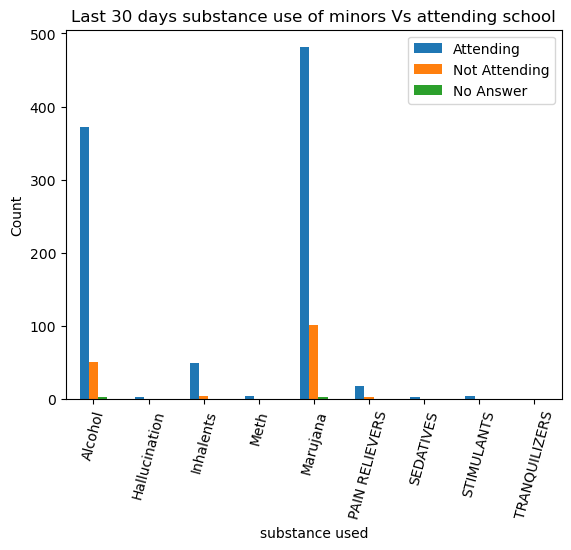

In [19]:
ax = pivot.plot( kind='bar',title='Last 30 days substance use of minors Vs attending school')
ax.set_xticklabels(['Alcohol','Hallucination','Inhalents', 'Meth', 'Marujana','PAIN RELIEVERS', 'SEDATIVES', 'STIMULANTS','TRANQUILIZERS'], rotation=75)
ax.set_xlabel("substance used")
ax.set_ylabel("Count")

# Employment Vs GeoGraphic

In [20]:
employment_data = drug_data[['WRKSTATWK2', 'WRKDPSTWK', 'WRKHADJOB', 'COUTYP4', 'WRKDPSTYR', 'WRKHADJOB','IRSEX', 'IRMARIT', 'CATAG7','HEALTH2', 'NEWRACE2']]
employment_data_plot = drug_data[['WRKDPSTWK', 'PDEN10']].query("WRKDPSTWK == 1 | WRKDPSTWK == 2 | WRKDPSTWK == 98 | WRKDPSTWK == 99")

print(employment_data_plot.head(10))
#employment_data_plot['WRKDPSTWK'].unique()
#employment_data_plot['PDEN10'].unique()
group_by = employment_data_plot.groupby(['WRKDPSTWK','PDEN10']).size().reset_index(name='count')
print(group_by.head(10))
pivot = pd.pivot_table(data=group_by, index=['WRKDPSTWK'], columns=['PDEN10'] ,values='count')
print(pivot)
pivot.columns = ['Population > Million', 'Popultion < Million', 'Not in a Segment']
print(pivot.columns)

   WRKDPSTWK  PDEN10
0          2       2
1          2       1
2          1       2
3          2       1
4          2       1
5          2       1
6          1       1
7          1       2
8         99       2
9          1       1
   WRKDPSTWK  PDEN10  count
0          1       1  11631
1          1       2  14155
2          1       3   1646
3          2       1   9630
4          2       2  11423
5          2       3   1741
6         98       1    873
7         98       2   1025
8         98       3     74
9         99       1   2317
PDEN10         1      2     3
WRKDPSTWK                    
1          11631  14155  1646
2           9630  11423  1741
98           873   1025    74
99          2317   2720   408
Index(['Population > Million', 'Popultion < Million', 'Not in a Segment'], dtype='object')


Text(0, 0.5, 'Count')

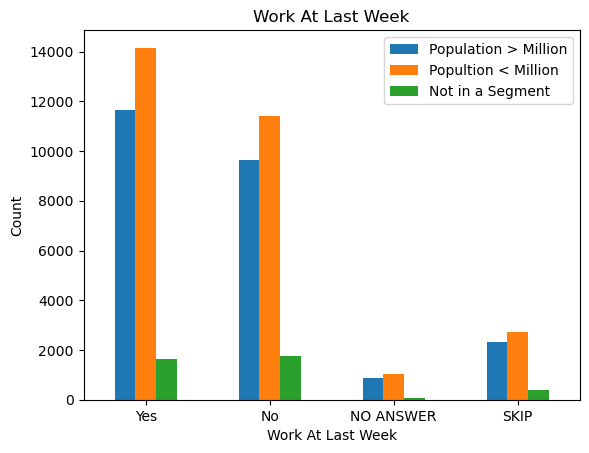

In [21]:
#WRKDPSTWK Len : 2 WORK AT JOB LAST WEEK
#PDEN10 Len : 1 POPULATION DENSITY 2010 - THREE LEVELS
ax = pivot.plot( kind='bar',title='Work At Last Week')
ax.set_xticklabels(['Yes','No','NO ANSWER', 'SKIP'], rotation=0)
ax.set_xlabel("Work At Last Week")
ax.set_ylabel("Count")

# Social Environment


In [22]:
# religious data
#SNRLGSVC1 Len : 2 PAST 12 MOS, HOW MANY RELIG. SERVICES
mental_health_data = drug_data[['SNRLGSVC']]

# Mental Health

In [23]:
mental_health_data = drug_data[['SNRLGSVC']]